In [3]:
# from netCDF4 import Dataset
import numpy as np
# import pandas as pd
from scipy import stats
import scipy.signal as signal
import matplotlib.pyplot as plt
import pickle
import matplotlib.cm as cm

plt.rcParams.update({'font.size': 14})

### BVF

In [4]:
with open('../support_data/bvs_lucky.pkl', 'rb') as f:
    ambient_stratification = pickle.load(f)

In [5]:
def lucky_bvf(z_i):
    with open('../support_data/bvs_lucky.pkl', 'rb') as f:
        ambient_stratification = pickle.load(f)
        
    z_lucky = ambient_stratification['z']
    bvf = ambient_stratification['BVF']
    
    aux = abs(z_lucky - z_i)
    
    jj = np.where(aux == np.amin(aux))
    #print(bvf[jj].data[0])
    bvf_lucky = bvf[jj].data[0] #s^-1 
    return bvf_lucky

In [6]:
lucky_bvf(800)

0.003772797451803075

### Power Spectra

In [7]:
with open('../support_data/PowerSpectra/psd_rbr_2015', 'rb') as f:
    PowerSpectra= pickle.load(f)

In [93]:
# upper_tick_locations = np.array([M2, M4, M6, f, week, month, yearly])
# upper_tick_labels = ['M2', 'M4', 'M6', 'f', 'week', 'month', 'year']

lat = 37 + .17/.6
f = 2*np.sin(lat*np.pi/180)
M2 = 24/12.42# 1/(12.42*3600) # M2
S2 = 2
M4 = 24/6.21
M6 = 24/4.14
week = 1./7 # yeah, weekly freq.
month = 1./30 # yeah, monthly freq.
yearly = 1./365 # yeah, annual freq.

z_min = min(PowerSpectra.keys())
z_max = max(PowerSpectra.keys())
print(z_min, z_max)
N_z_min = lucky_bvf(z_min)*3600*24
N_z_max = lucky_bvf(z_max)*3600*24
print(N_z_min, N_z_max)

upper_tick_locations = np.array([N_z_min, N_z_max, M2, M4, M6, f, week, month, yearly])
upper_tick_labels = ['$N_{max}$', '$N_{min}$','M2', 'M4', 'M6', 'f', 'week', 'month', 'year']

N = 100

upper_tick_locations_yearly = np.array([N, M2, M4, f, week, month, yearly])
upper_tick_labels_yearly = ['N', 'M2', 'M4', 'f', 'week', 'month', 'year']

upper_tick_locations

800.0 1660.0
325.96969983578566 130.30823283507047


array([3.25969700e+02, 1.30308233e+02, 1.93236715e+00, 3.86473430e+00,
       5.79710145e+00, 1.21151396e+00, 1.42857143e-01, 3.33333333e-02,
       2.73972603e-03])

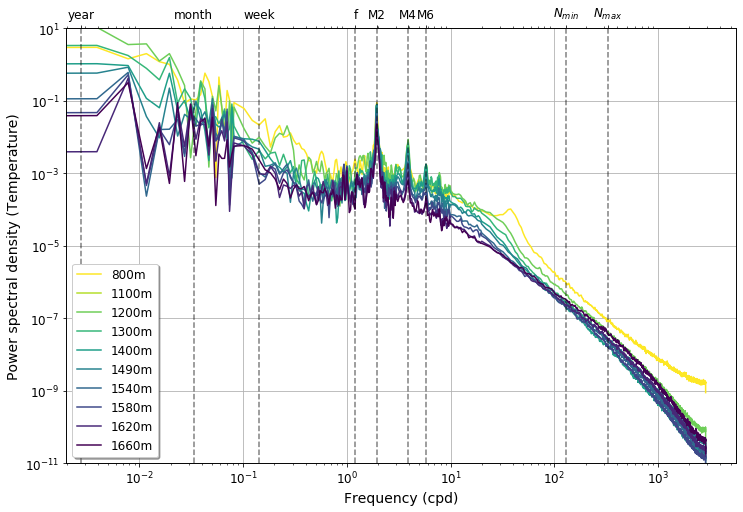

In [94]:
x_colors = np.linspace(0,1, len(PowerSpectra.keys()))
colors = cm.get_cmap('viridis_r')(x_colors)

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()

for j, depth in enumerate(sorted(PowerSpectra.keys())):
    ax1.loglog(PowerSpectra[depth]['freq'], PowerSpectra[depth]['psd'], 
               label=f"{depth:0.0f}m", c=colors[j])

ax2.loglog(PowerSpectra[depth]['freq'], PowerSpectra[depth]['psd'], alpha=0)

for typical_freq in upper_tick_locations:
    ax1.axvline(typical_freq, color='k', alpha=0.5, ls='--')

ax1.grid()
ax1.set_xlabel('Frequency (cpd)', fontsize=14)
ax1.set_ylabel('Power spectral density (Temperature)', fontsize=14)
ax1.set_ylim(1e-11,1e1)
ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(upper_tick_locations)
ax2.set_xticklabels(upper_tick_labels)
ax1.legend(loc='lower left', shadow=True)
#### SAVE THIS ####

# finding peaks

38.0


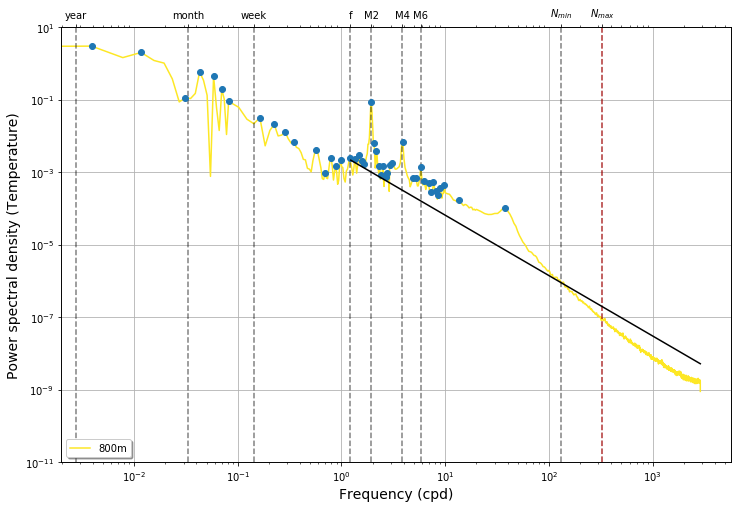

In [11]:
inds = signal.find_peaks(PowerSpectra[800]['psd'], prominence=0.00001)[0]

x_colors = np.linspace(0,1, len(PowerSpectra.keys()))
colors = cm.get_cmap('viridis_r')(x_colors)

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()

for j, depth in enumerate([800]):
    ax1.loglog(PowerSpectra[depth]['freq'], PowerSpectra[depth]['psd'], 
               label=f"{depth:0.0f}m", c=colors[j])

ax2.loglog(PowerSpectra[depth]['freq'], PowerSpectra[depth]['psd'], alpha=0)
ax2.scatter(PowerSpectra[depth]['freq'][inds], PowerSpectra[depth]['psd'][inds])

print(PowerSpectra[depth]['freq'][inds][-1])

for typical_freq in upper_tick_locations:
    ax1.axvline(typical_freq, color='k', alpha=0.5, ls='--')

ax1.axvline(lucky_bvf(800)*3600*24, color='r', alpha=0.5, ls='--')

freq = PowerSpectra[800]['freq']
inds = np.where(freq>f)
plt.loglog(freq[inds], freq[inds]**(-5./3.)*3e-3,'k')
#inds = np.where(freq<1)
#plt.loglog(freq[inds],freq[inds]**(-1.2)*1e-5,'k')

ax1.grid()
ax1.set_xlabel('Frequency (cpd)', fontsize=14)
ax1.set_ylabel('Power spectral density (Temperature)', fontsize=14)
ax1.set_ylim(1e-11,1e1)
ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(upper_tick_locations)
ax2.set_xticklabels(upper_tick_labels)
ax1.legend(loc='lower left', shadow=True)
#### SAVE THIS ####

In [12]:
38/f

31.36571364921505

# Multiyear power spectra analysis

I discard 2011 and 2012 because they have the largest depth correction factor, due to the mooring landing position.

In [77]:
with open('../support_data/depth_corrections', 'rb') as f:
    corrected_depths = pickle.load(f)
corrected_depths

{2011: -19.615851867218908,
 2012: -32,
 2013: 3.70249488253819,
 2014: 0.04927776721137889,
 2015: 0.40370765203715564,
 2016: -3.3022028677357866,
 2017: -4.766781823362862,
 2018: 9.363792231938532,
 2019: 5.9040092432962865}

#### SBE 1000 except 2011-2012

In [165]:
spectra_1000 = {}
i_level = 1000
instrument = 'sbe'
tolerance = 10
upper_tick_locations_yearly[0] = lucky_bvf(1000)*3600*24

for y in range(2013,2020):
    if y == 2018:
        # just realized that 2018  at 1000m doesn't make sense at all!
        continue
    with open(f'../support_data/PowerSpectra/psd_{instrument}_{y}', 'rb') as f:
        power_spect = pickle.load(f)
        
        depth_y = list(power_spect.keys())
        level_label = None
        
        for d_i in range(i_level - tolerance, i_level + tolerance):
            if d_i in depth_y:
                level_label = d_i
                break
        #print(y, depth_y, level_label)
        
        try:
            spectra_1000[y] = power_spect[level_label]
        except:
            print(f'{y} has no {i_level}m ± {tolerance}m level')

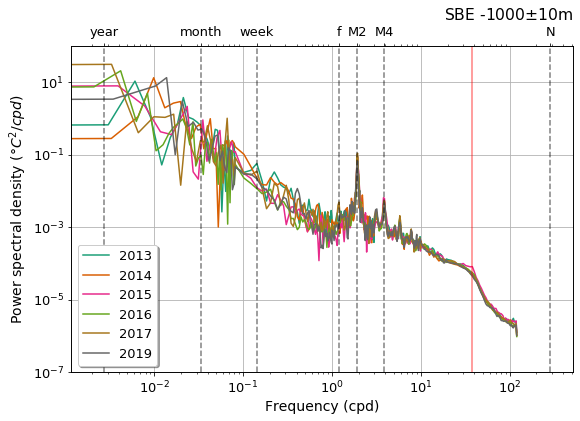

In [166]:
plt.rcParams.update({'font.size': 13})
data = spectra_1000

x_colors = np.linspace(0,1, len(data.keys()))
colors = cm.get_cmap('Dark2')(x_colors)

fig = plt.figure(figsize=(9,6))
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()

for j, depth in enumerate(sorted(data.keys())):
    ax1.loglog(data[depth]['freq'], data[depth]['psd'], 
               label=f"{depth:0.0f}", c=colors[j])

ax2.loglog(data[depth]['freq'], data[depth]['psd'], alpha=0)

for typical_freq in upper_tick_locations_yearly:
    ax1.axvline(typical_freq, color='k', alpha=0.5, ls='--')
    
ax1.axvline(38, color='r', alpha=0.5)

ax1.grid()
ax1.set_xlabel('Frequency (cpd)', fontsize=14)
ax1.set_ylabel('Power spectral density ($\degree C^2 / cpd$)', fontsize=14)
ax1.set_ylim(1e-7,1e2)
ax2.set_xlim(ax1.get_xlim())

ax2.set_xticks(upper_tick_locations_yearly)
ax2.set_xticklabels(upper_tick_labels_yearly)
ax1.legend(loc='lower left', shadow=True)
ax1.set_title(f'{instrument.upper()} -{i_level}$\pm${tolerance}m', loc='right')
plt.savefig(f'../figures/PowerSpectra/yearly/psd_{instrument}_{i_level}m')
#### SAVE THIS ####

#### SBE 1690±10 except 2011-2012

In [167]:
spectra = {}
i_level = 1690
instrument = 'sbe'
tolerance = 10
upper_tick_locations_yearly[0] = lucky_bvf(1000)*3600*24
for y in range(2013,2020):
#     if y == 2018:
#         # just realized that 2018  at 1000m doesn't make sense at all!
#         continue
    with open(f'../support_data/PowerSpectra/psd_{instrument}_{y}', 'rb') as f:
        power_spect = pickle.load(f)
        
        depth_y = list(power_spect.keys())
        level_label = None
        
        for d_i in range(i_level - tolerance, i_level + tolerance):
            if d_i in depth_y:
                level_label = d_i
                break
        print(y, level_label)
        
        try:
            spectra[y] = power_spect[level_label]
        except:
            print(f'{y} has no {i_level}m ± {tolerance}m level')

2013 1688
2014 None
2014 has no 1690m ± 10m level
2015 1688
2016 1688
2017 1686
2018 1689
2019 1689


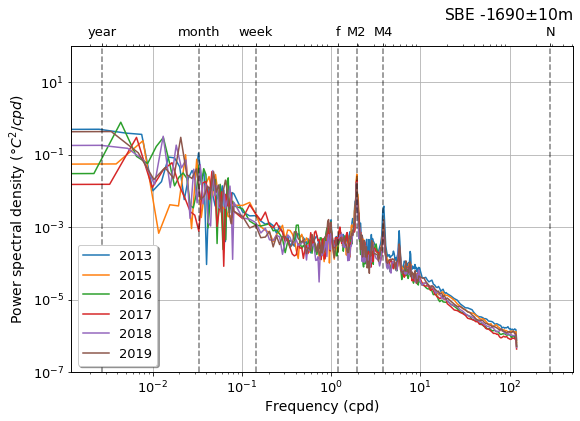

In [168]:
plt.rcParams.update({'font.size': 13})
data = spectra

# x_colors = np.linspace(0,1, len(data.keys()))
# colors = cm.get_cmap('tab10')(x_colors)

fig = plt.figure(figsize=(9,6))
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()

for j, depth in enumerate(sorted(data.keys())):
    ax1.loglog(data[depth]['freq'], data[depth]['psd'], 
               label=f"{depth:0.0f}") #, c=colors[j])

ax2.loglog(data[depth]['freq'], data[depth]['psd'], alpha=0)

for typical_freq in upper_tick_locations_yearly:
    ax1.axvline(typical_freq, color='k', alpha=0.5, ls='--')

#ax1.axvline(38, color='r', alpha=0.5)

ax1.grid()
ax1.set_xlabel('Frequency (cpd)', fontsize=14)
ax1.set_ylabel('Power spectral density ($\degree C^2 / cpd$)', fontsize=14)
ax1.set_ylim(1e-7,1e2)
ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(upper_tick_locations_yearly)
ax2.set_xticklabels(upper_tick_labels_yearly)
ax1.legend(loc='lower left', shadow=True)
ax1.set_title(f'{instrument.upper()} -{i_level}$\pm${tolerance}m', loc='right')
plt.savefig(f'../figures/PowerSpectra/yearly/psd_{instrument}_{i_level}m')
#### SAVE THIS ####

#### RBR 1200  except 2011-2012

In [196]:
spectra = {}
i_level = 1200
instrument = 'rbr'
tolerance = 10
upper_tick_locations_yearly[0] = lucky_bvf(1000)*3600*24
for y in range(2013,2020):
#     if y == 2018:
#         # just realized that 2018  at 1000m doesn't make sense at all!
#         continue
    with open(f'../support_data/PowerSpectra/psd_{instrument}_{y}', 'rb') as f:
        power_spect = pickle.load(f)
        
        depth_y = list(power_spect.keys())
        level_label = None
        
        for d_i in range(i_level - tolerance, i_level + tolerance):
            if d_i in depth_y:
                level_label = d_i
                break
        #print(y, depth_y, level_label)
        
        try:
            spectra[y] = power_spect[level_label]
        except:
            print(f'{y} has no {i_level}m ± {tolerance}m level')

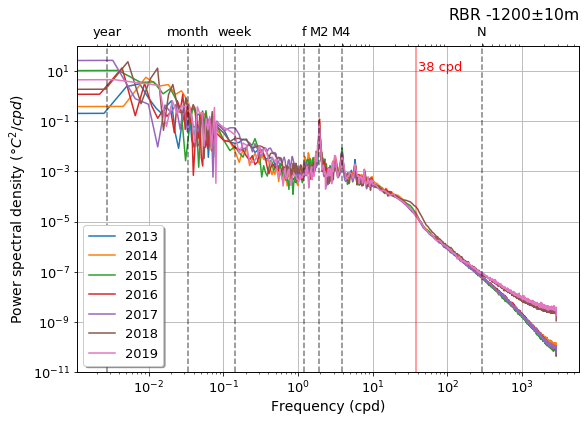

In [197]:
plt.rcParams.update({'font.size': 13})
data = spectra

x_colors = np.linspace(0,1, len(data.keys()))
colors = cm.get_cmap('Dark2')(x_colors)

fig = plt.figure(figsize=(9,6))
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()

for j, depth in enumerate(sorted(data.keys())):
    ax1.loglog(data[depth]['freq'], data[depth]['psd'], 
               label=f"{depth:0.0f}")

ax2.loglog(data[depth]['freq'], data[depth]['psd'], alpha=0)

for typical_freq in upper_tick_locations_yearly:
    ax1.axvline(typical_freq, color='k', alpha=0.5, ls='--')

ax1.axvline(38, color='r', alpha=0.5)
ax1.text(40, 1e1, '38 cpd', color='red')
    
ax1.grid()
ax1.set_xlabel('Frequency (cpd)', fontsize=14)
ax1.set_ylabel('Power spectral density ($\degree C^2 / cpd$)', fontsize=14)
ax1.set_ylim(1e-11,1e2)
ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(upper_tick_locations_yearly)
ax2.set_xticklabels(upper_tick_labels_yearly)
ax1.legend(loc='lower left', shadow=True)
ax1.set_title(f'{instrument.upper()} -{i_level}$\pm${tolerance}m', loc='right')
plt.savefig(f'../figures/PowerSpectra/yearly/psd_{instrument}_{i_level}m')
#### SAVE THIS ####

####  rbr 800±10m except 2011 and 2012

In [198]:
spectra = {}
i_level = 800
instrument = 'rbr'
tolerance = 20
upper_tick_locations_yearly[0] = lucky_bvf(1000)*3600*24
for y in range(2011,2020):
    
#     if y == 2018:
#         # just realized that 2018  at 1000m doesn't make sense at all!
#         continue
    with open(f'../support_data/PowerSpectra/psd_{instrument}_{y}', 'rb') as f:
        power_spect = pickle.load(f)
        
        depth_y = list(power_spect.keys())
        level_label = None
        
        for d_i in range(i_level - tolerance, i_level + tolerance):
            if d_i in depth_y:
                level_label = d_i
                break
        #print(y, level_label, '---', depth_y)
        
        try:
            spectra[y] = power_spect[level_label]
            print(y, level_label)
        except:
            print(f'{y} has no {i_level}m ± {tolerance}m level')

2011 has no 800m ± 20m level
2012 has no 800m ± 20m level
2013 has no 800m ± 20m level
2014 800
2015 800
2016 800
2017 780
2018 800
2019 800


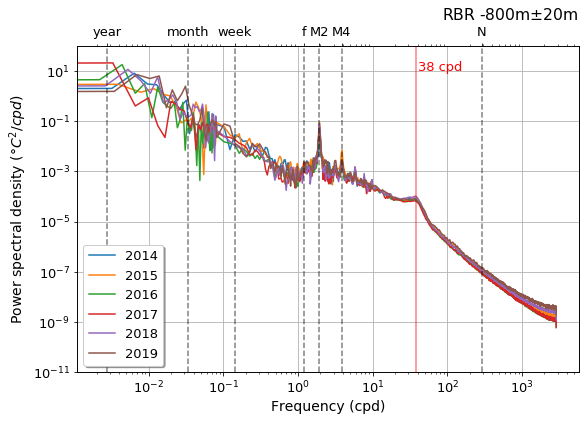

In [199]:
plt.rcParams.update({'font.size': 13})
data = spectra

# x_colors = np.linspace(0,1, len(data.keys()))
# colors = cm.get_cmap('Dark2')(x_colors)

fig = plt.figure(figsize=(9,6))
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()

for j, depth in enumerate(sorted(data.keys())):
    ax1.loglog(data[depth]['freq'], data[depth]['psd'], 
               label=f"{depth:0.0f}") #, c=colors[j])

ax2.loglog(data[depth]['freq'], data[depth]['psd'], alpha=0)

for typical_freq in upper_tick_locations_yearly:
    ax1.axvline(typical_freq, color='k', alpha=0.5, ls='--')

ax1.axvline(38, color='r', alpha=0.5)
ax1.text(40, 1e1, '38 cpd', color='red')

ax1.grid()
ax1.set_xlabel('Frequency (cpd)', fontsize=14)
ax1.set_ylabel('Power spectral density ($\degree C^2 / cpd$)', fontsize=14)
ax1.set_ylim(1e-11,1e2)
ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(upper_tick_locations_yearly)
ax2.set_xticklabels(upper_tick_labels_yearly)
ax1.legend(loc='lower left', shadow=True)
ax1.set_title(f'{instrument.upper()} -{i_level}m$\pm${tolerance}m', loc='right')
plt.savefig(f'../figures/PowerSpectra/yearly/psd_{instrument}_{i_level}m')
#### SAVE THIS ####

### rbr -1000

In [200]:
spectra = {}
i_level = 1100
instrument = 'rbr'
tolerance = 10
upper_tick_locations_yearly[0] = lucky_bvf(1000)*3600*24
for y in range(2011,2020):
    
#     if y == 2018:
#         # just realized that 2018  at 1000m doesn't make sense at all!
#         continue
    with open(f'../support_data/PowerSpectra/psd_{instrument}_{y}', 'rb') as f:
        power_spect = pickle.load(f)
        
        depth_y = list(power_spect.keys())
        level_label = None
        
        for d_i in range(i_level - tolerance, i_level + tolerance):
            if d_i in depth_y:
                level_label = d_i
                break
        #print(y, level_label, '---', depth_y)
        
        try:
            spectra[y] = power_spect[level_label]
            print(y, level_label)
        except:
            print(f'{y} has no {i_level}m ± {tolerance}m level')

2011 has no 1100m ± 10m level
2012 1100
2013 1100
2014 1100
2015 1100
2016 has no 1100m ± 10m level
2017 has no 1100m ± 10m level
2018 has no 1100m ± 10m level
2019 has no 1100m ± 10m level


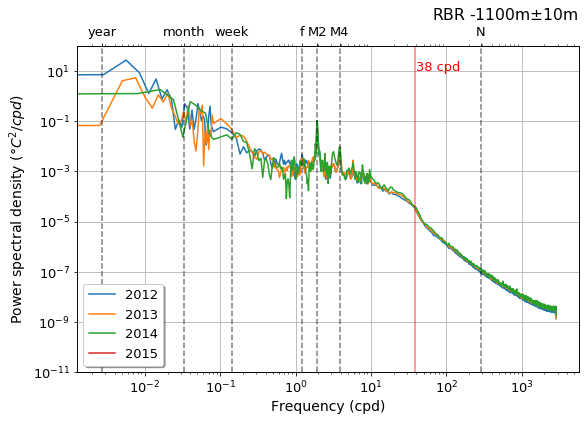

In [201]:
plt.rcParams.update({'font.size': 13})
data = spectra

# x_colors = np.linspace(0,1, len(data.keys()))
# colors = cm.get_cmap('Dark2')(x_colors)

fig = plt.figure(figsize=(9,6))
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()

for j, depth in enumerate(sorted(data.keys())):
    ax1.loglog(data[depth]['freq'], data[depth]['psd'], 
               label=f"{depth:0.0f}") #, c=colors[j])

ax2.loglog(data[depth]['freq'], data[depth]['psd'], alpha=0)

for typical_freq in upper_tick_locations_yearly:
    ax1.axvline(typical_freq, color='k', alpha=0.5, ls='--')

ax1.axvline(38, color='r', alpha=0.5)
ax1.text(40, 1e1, '38 cpd', color='red')

ax1.grid()
ax1.set_xlabel('Frequency (cpd)', fontsize=14)
ax1.set_ylabel('Power spectral density ($\degree C^2 / cpd$)', fontsize=14)
ax1.set_ylim(1e-11,1e2)
ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(upper_tick_locations_yearly)
ax2.set_xticklabels(upper_tick_labels_yearly)
ax1.legend(loc='lower left', shadow=True)
ax1.set_title(f'{instrument.upper()} -{i_level}m$\pm${tolerance}m', loc='right')
plt.savefig(f'../figures/PowerSpectra/yearly/psd_{instrument}_{i_level}m')
#### SAVE THIS ####